# Lab 5: KNN

In this assignment, we will learn the KNN model.

First, please study the given example, which uses the KNN model for the breast cancer classification task. In this example, you will learn how to preprocess data, how to train the model, and how to evaluate the model.

Based on the given example, your task is to use the KNN model to predict the presence of heart disease.


## 1. Example

### 1.1 Load the breast cancer data

Here, we use the [breast cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer) dataset in sklearn. It is a binary classification dataset. Each sample has 30 numerical features, which can be found in [7.1.7](https://scikit-learn.org/stable/datasets/toy_dataset.html).

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from random import shuffle
import random
random.seed(123)

X, y = datasets.load_breast_cancer(return_X_y=True)
print("#samples: {}, #features: {}".format(X.shape[0], X.shape[1]))

#samples: 569, #features: 30


### 1.2 Split the data into two subsets and normalize the features of samples

Here, we use 69 samples as the testing set and use the remained samples to train the logistic regression model. 

In [9]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, 
                                                            test_size=0.12, 
                                                            random_state=0)
print("train_val: {}, test: {}".format(X_train_val.shape[0], X_test.shape[0]))

normalizer = StandardScaler()
X_train_val = normalizer.fit_transform(X_train_val)
X_test = normalizer.transform(X_test)


train_val: 500, test: 69


### 1.3 Train the KNN model and select the hyperparameter with cross-validation

Here, we use cross-validation to select the hyperparameter $K$

In [11]:
k_range = range(1, 5)
param_grid = dict(n_neighbors=k_range)

clf_knn =  KNeighborsClassifier(n_neighbors=1)

grid = GridSearchCV(clf_knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_val, y_train_val)

print(grid.best_score_)
print(grid.best_params_)

0.9640000000000001
{'n_neighbors': 4}


### 1.4 Evaluate the learned model

After getting the best hyperparameter $K$,  we evaluate this  model on the testing set. 

In [12]:
clf_knn =  KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
clf_knn.fit(X_train_val, y_train_val)

# evaluate the model on the testing set
y_test_pred = clf_knn.predict(X_test)


acc = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)


print("accuracy: {:.3f}, recall: {:.3f}, precision: {:.3f}, f1: {:.3f},".format(acc, recall, precision, f1))

accuracy: 0.971, recall: 0.975, precision: 0.975, f1: 0.975,


## 2. Task

Here, we use the [heart disease](./heart.csv) dataset. Each sample has the following feature: 

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

The last column refers to the presence of heart disease in the patient.

The task is to predict whether a person has the heart disease. Here, you can use your code in Lab04 for Task 2.1 and Task 2.2. 

### 2.1 Preprocess the raw data

* Check whether there are missing values
* Check whether theare are cateogrical features
* Check whether this dataset is balanced or not (use the bar plot to visualize the number of positive and negative samples)


(303, 14)

Categorical columns: []


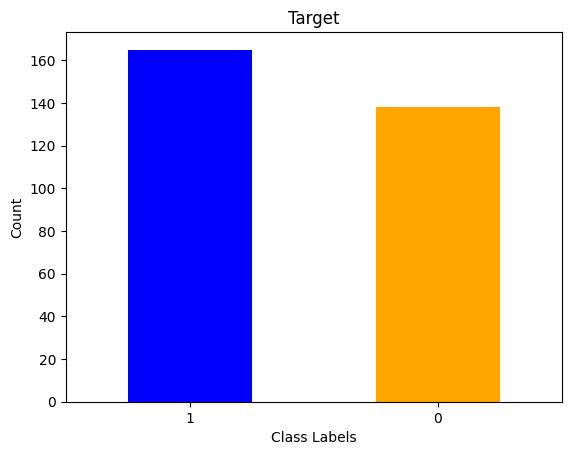

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [16]:
import pandas
import matplotlib.pyplot as pyplot

#load data
pandasDataFrame = pandas.read_csv('heart.csv')
print("{}\n".format(pandasDataFrame.shape))

#check for categorical features
categorical_columns = [col for col in pandasDataFrame.columns if pandasDataFrame[col].dtype == 'object' or pandasDataFrame[col].dtype.name == 'category']
print("Categorical columns:", categorical_columns)

#bar plots
pandasDataFrame['target'].value_counts().plot(kind='bar', color=['blue', 'orange'])

# Labeling the plot
pyplot.xlabel('Class Labels')
pyplot.ylabel('Count')
pyplot.title('Target')
pyplot.xticks(rotation=0)
pyplot.show()

#check for missing values
pandasDataFrame.isnull().sum()

### 2.2 Split the data into two subsets and normalize the features of samples

* Split the dataset into the train_val set and testing set. 
* Normalize features

In [20]:
#split data
heart_feature = pandasDataFrame.drop('target', axis=1).values
heart_charge = pandasDataFrame['target'].values
heart_charge = heart_charge / np.max(heart_charge)

X_train_val, X_test, y_train_val, y_test = train_test_split(heart_feature, heart_charge, 
                                                            test_size=0.14, 
                                                            random_state=0)
print("train_val: {}, test: {}".format(X_train_val.shape[0], X_test.shape[0]))

#normalize data
normalizer = StandardScaler()
X_train_val = normalizer.fit_transform(X_train_val)
X_test = normalizer.transform(X_test)


train_val: 260, test: 43


### 2.3 Train the KNN model and select the hyperparameter with cross-validation


* Use the 5-fold cross-validation to select the hyperparameter $K$.
* Search $K$ from $\{1, 2, 3, 4, 5\}$


In [ ]:
# here we use 5-fold cross-validation
folds = 5

# get the number of samples in the training and validation set
num_train_val = X_train_val.shape[0] 

# shuffle the index of samples in the train_val set
index_of_samples = np.arange(num_train_val) 
shuffle(index_of_samples)

# split the index of the train_valid set into 5 folds
index_of_folds = index_of_samples.reshape(folds, -1)
print(index_of_folds)

# potential hyperparameters. 
#These hyperparameters are just used for illustration. 
#You should try more hyperparameters to get a good model.
#The hyperparameters must be nonnegative!
regularization_coefficient = [1,2,3,4,5]

best_acc = 0.0
best_reg = 0.0

for reg in regularization_coefficient:
    
    # 5-fold cross-validation
    sum_acc = 0.0
    for fold in range(folds):
        
        index_of_folds_temp = index_of_folds.copy()
        
        valid_index = index_of_folds_temp[fold,:].reshape(-1) #get the index of the validation set
        train_index = np.delete(index_of_folds_temp, fold, 0).reshape(-1) #get the index of the training set
        
        # training set
        X_train = X_train_val[train_index]
        y_train = y_train_val[train_index]
        
        # validation set
        X_valid = X_train_val[valid_index]
        y_valid = y_train_val[valid_index]
                
        # build the model with different hyperparameters
        clf = KNeighborsClassifier(n_neighbors=reg)
        
        #train the model with the training set
        clf.fit(X_train, y_train)
        
        y_valid_pred = clf.predict(X_valid)
        acc = accuracy_score(y_valid, y_valid_pred)
        
        sum_acc += acc
    
    cur_acc = sum_acc / folds
    
    print("reg_coeff: {}, acc: {:.3f}".format(1.0/reg, cur_acc))
    
    # store the best hyperparameter
    if cur_acc > best_acc:
        best_acc = cur_acc
        best_reg = reg
        
    


[[215  27 170 147  96 183 224 117   7 207 221  92   0  16  84   4  97 199
   67 156 184  31  73 126 185  43  71 238  75 151 194  33 177  40 111 133
  242  19  49 196 115 135  21 208 250 239 178 162 237 105  69 218]
 [ 78 212 103  58  72 257 202 119  99 206   2  41  77 210  56 138 248 159
   74 139 172 153 110 100 104  64  38 174   6 108   5 222  55 181 226 152
   54 116 197 188 219 144  15 131  11 223 233 204  48 148 189 155]
 [ 50  14 122 200 150 137 229  29  44  23 253 190 145 187 220 141  53  65
   62  76 180  66 252 136  30 165  52  88 241  79  91 213 254 227 157 164
  243  51 114  32  47   8 228  87 121 143 140  61  82  93  90   9]
 [ 28   3 118 113  83  22 217 247 256  12  81 259 179 109  17  57 112 163
  236 211  89  70  39 120   1 171 128 245  46 167 130  63 142 209 102 192
  175  42 214  37  35  10  94  36 198 251 132 176  13 234 186 244]
 [ 60 246 123 235 258  68 166 232 201 106 216 161 154  80  85 127 230 203
  160 225 240 249 134 124 195  25 182 173 129  34  98 146  59  18 

### 2.4 Evaluate the learned model

* Report the prediction accuracy, recall, precision, and F1 score.

* Note that you should implement the code for these metrics by yourself. Please do NOT use the built-in function in sklearn. 

In [ ]:
clf_knn = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
clf_knn.fit(X_train_val, y_train_val)

# evaluate the model on the testing set
y_test_pred = clf_knn.predict(X_test)


#TODO: DO THESE EQUATIONS MANUALLY

acc = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)


print("accuracy: {:.3f}\nrecall: {:.3f}\nprecision: {:.3f}\nf1: {:.3f}\n".format(acc, recall, precision, f1))

accuracy: 0.860
recall: 0.857
precision: 0.857
f1: 0.857

